## Аналитика в интернет магазине

Описание проекта: Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Часть 1. Приоритизация гипотез.

Изучим датафрейм

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

Добавим опцию, чтобы видеть ьназвание полностью

In [3]:
pd.options.display.max_colwidth = 120

In [4]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Заменим названия столбцов на более корректные

In [6]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

Прменим фреймворк ICE для приоритезации гипотез

$$ ICE =  \frac{Impact * Confidence}{Efforts} $$

In [7]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Прменим фреймворк RICE для приоритезации гипотез

$$ RICE = \frac{Reach * Impact * Confidence}{Effort}

In [8]:
hypothesis['rice'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']

In [9]:
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [10]:
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Вывод

Приоритезировали гипотезы и выяснили, что используя фреймворк ice гипотезам с индексом 8, 0, 7 отдаем главные приоритеты. Но используя фреймворк rice ситуация изменилась и самыми приоритетными являеются гипотезы 7, 2, 0. Это связано с тем, что у гипотез 7 и 2 высокий показатель пользователей, которых затронет изменение. А у самого приоритетного при фреймворке ice, этот показатель самый минимальный

## Часть 2. Анализ A/B-теста

Изучим датафреймы

In [11]:
orders = pd.read_csv('/datasets/orders.csv')

In [12]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Посмотрим нет ли пропусков

In [14]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

И заменим названия столбцов на более корректные

In [15]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

И изменим формат даты

In [16]:
orders['date'] = pd.to_datetime(orders['date'])

Очистим датафрейм от пользователей, которые находятся в 2 группах

In [17]:
visitors_fail = (orders.groupby('visitor_id')['group'].nunique().reset_index()).query('group == 2')

In [18]:
visitors_fail = visitors_fail['visitor_id']

In [19]:
orders = orders.loc[~orders['visitor_id'].isin(visitors_fail)]

In [20]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [21]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [23]:
visitors['date'] = pd.to_datetime(visitors['date'])

Посмотрим нет ли пропусков

In [24]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

### Построим график кумулятивной выручки по группам

Создадим массив унрикальных пар и групп

In [25]:
dates_group = orders[['date', 'group']].drop_duplicates()

Посчитаем на каждую дату и группу накопленную выручку, количество заказов и количество уникальных пользователей

In [26]:
orders_agg = dates_group.apply\
(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
 .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'})\
 , axis=1).sort_values(by=['date', 'group'])

Посчитаем количетсво накопленное количество посетителей

In [27]:
visitors_agg = dates_group.apply\
(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
 .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [28]:
culmulative = pd.merge(orders_agg, visitors_agg, on=['date', 'group'])

In [29]:
culmulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Разделим все по группам и построим график

In [30]:
culmulative_revenueA = culmulative[culmulative['group'] == 'A'][['date', 'revenue']]
culmulative_revenueB = culmulative[culmulative['group'] == 'B'][['date', 'revenue']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


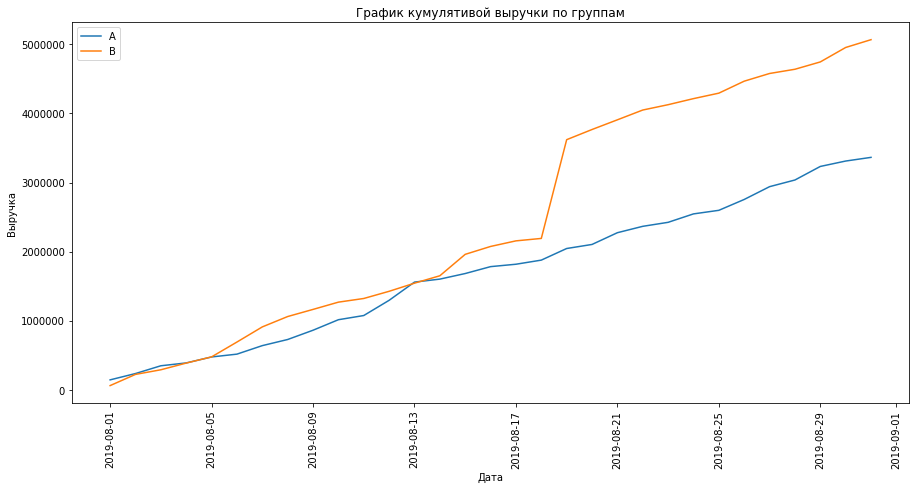

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(culmulative_revenueA['date'], culmulative_revenueA['revenue'], label='A')
plt.plot(culmulative_revenueB['date'], culmulative_revenueB['revenue'], label='B')
plt.title('График кумулятивой выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Выручка равномернот растет по двум группам, но 2019-08-19 в группе B произошел скачок. Возможно была произведена дорогая покупка. Далее все расло одинаково равномерно.

### Построим график кумулятивного  среднего  чека по группам

Добавим столбец с кульмулятивным средним чеком в каждй день

In [32]:
culmulative['av_invoice'] = culmulative['revenue'] / culmulative['orders']

Разделим все по группам и построим график

In [33]:
culmulative_av_invoiceA = culmulative[culmulative['group'] == 'A'][['date', 'av_invoice']]
culmulative_av_invoiceB = culmulative[culmulative['group'] == 'B'][['date', 'av_invoice']]

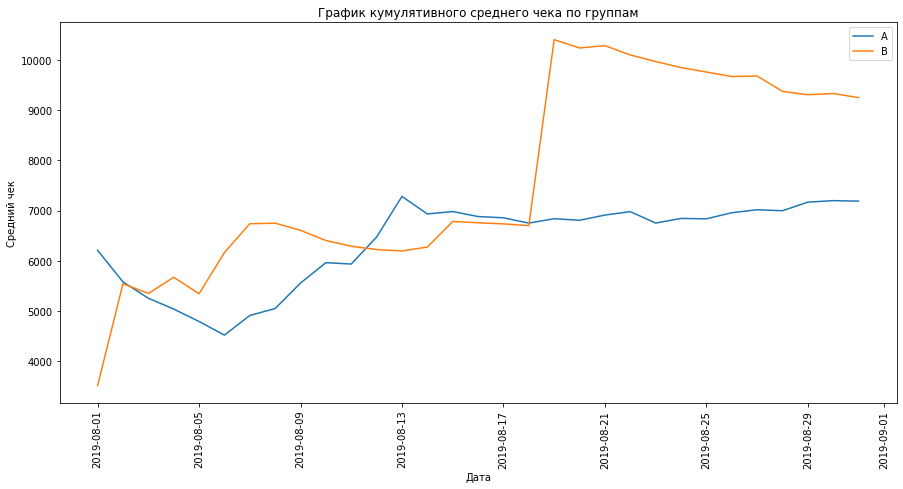

In [34]:
plt.figure(figsize=(15,7))
plt.plot(culmulative_av_invoiceA['date'], culmulative_av_invoiceA['av_invoice'], label='A')
plt.plot(culmulative_av_invoiceB['date'], culmulative_av_invoiceB['av_invoice'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Видим, что средний чек был почти одинаковый до 2019-08-19. Как мы видели и по граифку выручки, видимо состоялась дорогая покупка, далее средний чек группы B начал понемногу падать, но все равно выше чем в группе B.

### Построим график отношения среднего чека группы B к группе A

Объеденим таблицы и посчитаем отношение. Затем построим график

In [35]:
culmulative_AB_invoice = pd.merge(culmulative_av_invoiceA, culmulative_av_invoiceB, on='date', suffixes=['_A', '_B'])

In [36]:
culmulative_AB_invoice['B/A'] = culmulative_AB_invoice['av_invoice_B'] / culmulative_AB_invoice['av_invoice_A']

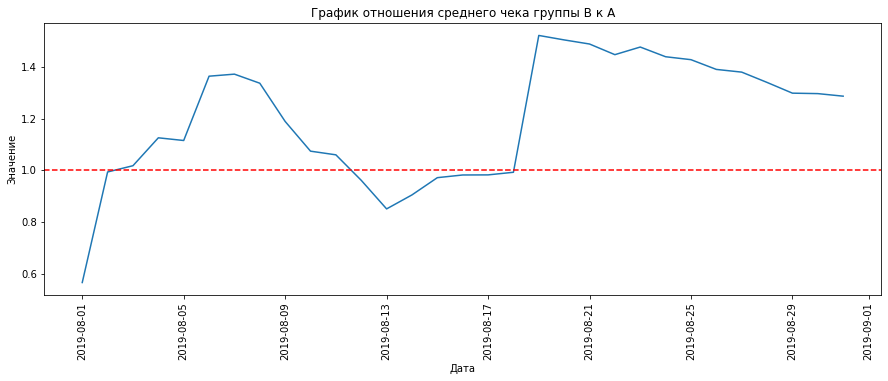

In [37]:
plt.figure(figsize=(15,5))
plt.plot(culmulative_AB_invoice['date'], culmulative_AB_invoice['B/A'], )
plt.title('График отношения среднего чека группы B к A')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=90)
plt.axhline(y=1, color='red', linestyle='--')
plt.show()

Видим, что в первый день группа B сильно устапала группе A. Затем уже на протяжении небольшого периода была выше и затем снова упала. После 2019-08-16 пошла вверх иуже средний чек не был меньше группы A

### Построим график кумулятивной конверсии по группам

Разобъем по группам, а затем посчитаем конверсию для каждой и построим графики

In [38]:
culmulative_orders_A = culmulative[culmulative['group'] == 'A'][['date', 'orders', 'visitors']]
culmulative_orders_B = culmulative[culmulative['group'] == 'B'][['date', 'orders', 'visitors']]

In [39]:
culmulative_orders_A['conversion'] = culmulative_orders_A['orders']/culmulative_orders_A['visitors']
culmulative_orders_B['conversion'] = culmulative_orders_B['orders']/culmulative_orders_B['visitors']

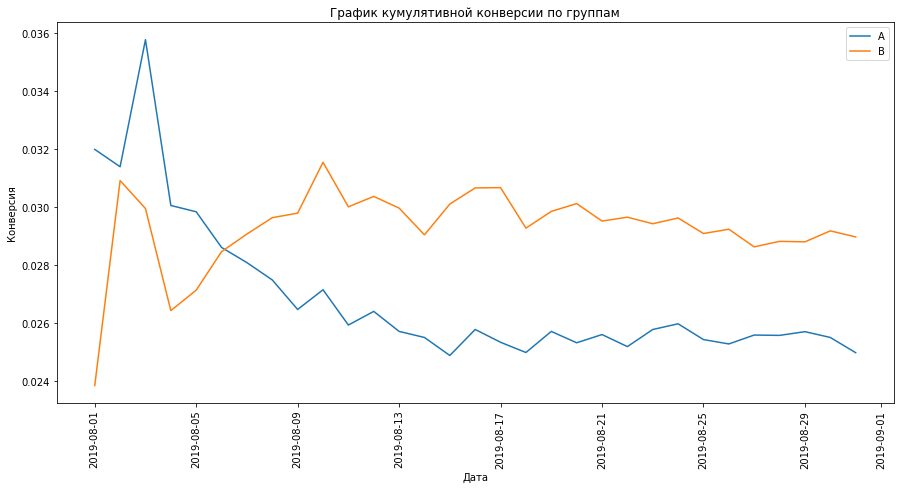

In [40]:
plt.figure(figsize=(15,7))
plt.plot(culmulative_orders_A['date'], culmulative_orders_A['conversion'], label='A')
plt.plot(culmulative_orders_B['date'], culmulative_orders_B['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Видим, что конверсия группы А сначала была лучше, а у В была низкой. Но же спутся пару днец конверсия группы В вышла и вперед и была лучше до конца теста

### Построим график отношения кумулятивной конверсии группы B к группе A

Объеденим группы в один датафрейм по датам, а затем посчитаем отношение и построим график

In [41]:
culmulative_orders = pd.merge(culmulative_orders_A, culmulative_orders_B, on='date', suffixes=['_A', '_B'])

In [42]:
culmulative_orders['conversion_B/A'] = culmulative_orders['conversion_B']/culmulative_orders['conversion_A'] - 1

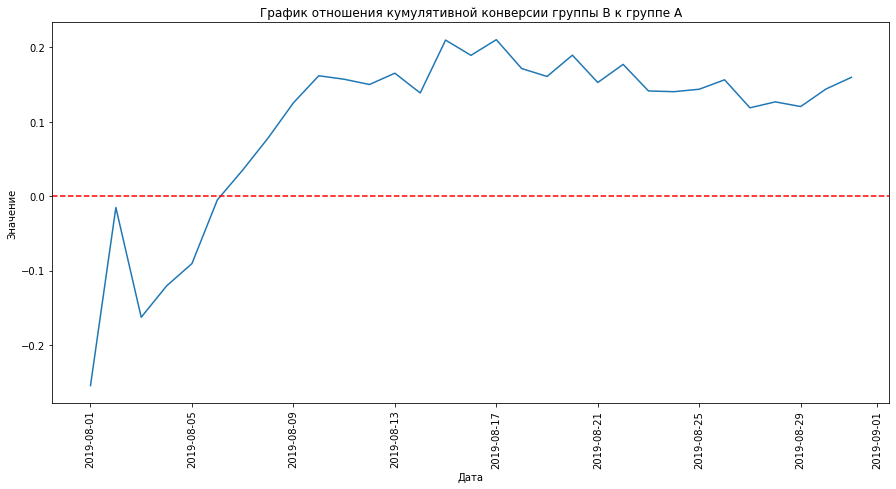

In [43]:
plt.figure(figsize=(15,7))
plt.plot(culmulative_orders['date'], culmulative_orders['conversion_B/A'])
plt.title('График отношения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Изначально конверсия группы В была ниже, но уже в начале теста стала лучше и так держалась весь тест

### Построим точечный график количества заказов по пользователям.

Найдем количество заказов каждого покупателя и построим график

In [44]:
scatter_orders = orders.groupby('visitor_id')['transaction_id'].nunique()

In [45]:
x_values = pd.Series(range(0, len(scatter_orders)))

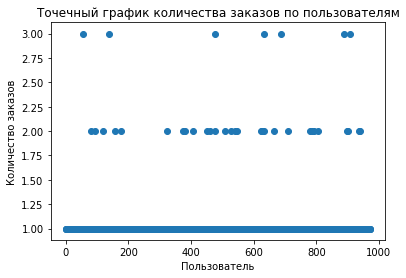

In [46]:
plt.scatter(x_values, scatter_orders)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

В основном заказывают 1 раз, минимальное количество пользователей заказывает больше раз

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [47]:
print(np.percentile(scatter_orders,[95, 99]))

[1. 2.]


1 Процент всех пользователей заказывают больше 2 раз. Выберем границу аномалий равную больше 2 заказов

### Построим точечный график стоимостей заказов.

In [48]:
y_value = pd.Series(range(0, len(orders['revenue'])))

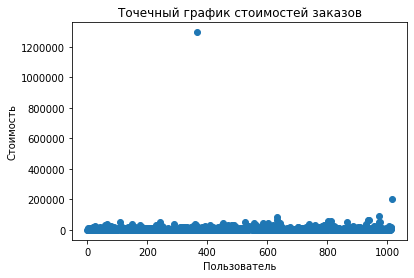

In [49]:
plt.scatter(y_value, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость')
plt.show()

В основном все заказы стоят до 100000, но есть выбросы.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [51]:
print(np.percentile(orders['revenue'], [95,99]))

[26785. 53904.]


99 процентов заказов с ценой до 53904, выберем эту стоимость как границу аномалий

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Создадим один датафрейм со всеми кумулятивными показателеми и показателями за каждый день

Найдем количество и сумму заказов за каждый день

In [62]:
orders_day_A = orders[orders['group'] == 'A'].groupby('date')\
.agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'}).reset_index()
orders_day_A.columns = ['date', 'orders_day_A', 'revenue_day_A']

In [63]:
orders_day_B = orders[orders['group'] == 'B'].groupby('date')\
.agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'}).reset_index()
orders_day_B.columns = ['date', 'orders_day_B', 'revenue_day_B']

In [64]:
orders_day = pd.merge(orders_day_A, orders_day_B, on='date', suffixes=('_A', '_B'))

Найдем количесвто посетителей за каждый день

In [65]:
visitors_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A.columns = ['date', 'visitors_day_A']

In [66]:
visitors_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B.columns = ['date', 'visitors_day_B']

In [67]:
visitors_day = pd.merge(visitors_A, visitors_B, on='date')

Найдем накопительные количество заказов, покупателей и сумму заказов

In [68]:
dates_group = visitors[['date', 'group']].drop_duplicates()

In [69]:
culmulative_orders = dates_group.apply\
(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

In [70]:
culmulative_orders.columns = ['date', 'group', 'culmulative_orders', 'culmulative_buyers', 'culmulative_revenue']

In [75]:
culmalative_A = culmulative_orders[culmulative_orders['group'] == 'A']
culmalative_B = culmulative_orders[culmulative_orders['group'] == 'B']
culmulative_AB = pd.merge(culmalative_A, culmalative_B, on='date', suffixes=('_A', '_B'))
culmulative_AB = culmulative_AB.drop(['group_A', 'group_B'], axis=1)

Найдем накопительное количесвто посетителей

In [76]:
culmulative_visitors = dates_group.apply\
(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [77]:
culmulative_visitors.columns = ['date', 'group', 'culmulative_visitors']

In [78]:
culmulative_visitors_A = culmulative_visitors[culmulative_visitors['group'] == 'A']
culmulative_visitors_B = culmulative_visitors[culmulative_visitors['group'] == 'B']
culmulative_visitors_AB = pd.merge(culmulative_visitors_A, culmulative_visitors_B, on='date', suffixes=('_A', '_B'))
culmulative_visitors_AB = culmulative_visitors_AB.drop(['group_A', 'group_B'], axis=1)

Объеденим все в одну таблицу

In [79]:
final = visitors_day.merge(culmulative_AB, on='date').merge(orders_day, on='date').merge(culmulative_visitors_AB, on='date')

В каждой строке запишем количество заказов для каждого пользователя

In [124]:
orders_by_user_A = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id':pd.Series.nunique})
orders_by_user_A.columns = ['visitor_id', 'orders']

In [66]:
orders_by_user_B = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id':pd.Series.nunique})
orders_by_user_B.columns = ['visitor_id', 'orders']

Добавим строки с 0 заказов, для пользователей, которые не заказывали

In [67]:
sample_A = pd.concat([orders_by_user_A['orders'], pd.Series(0, index=np.arange(final['visitors_day_A']\
.sum() - len(orders_by_user_A['orders'])), name='orders')], axis=0)
sample_B = pd.concat([orders_by_user_B['orders'], pd.Series(0, index=np.arange(final['visitors_day_B']\
.sum() - len(orders_by_user_B['orders'])), name='orders')], axis=0)

И посчитаем статистическую значимость. Сформулируем нулевую гипотезу - разницы между группами нет если p_value > 0,05 и альтернативную - разница между группа есть если p_value < 0,05. 

In [68]:
print('{0:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1]))

0.006


И сравним средние

In [69]:
print('{0:.3f}'.format(sample_B.mean()/sample_A.mean() - 1))

0.160


Получили низкую статистическую значимость, принимаем альтернативную гипотезу и значит разница есть. По относительному сравнению средних, показатели группы B выше на 16%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость в среднем чеке.  Сформулируем нулевую гипотезу - разницы между группами нет если p_value > 0,05 и альтернативную - разница между группа есть если p_value < 0,05. 

In [70]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],\
                                          orders[orders['group'] == 'B']['revenue'])[1]))

0.415


Посчитаем относительную разницу между средними

In [71]:
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()\
                       /orders[orders['group'] == 'A']['revenue'].mean() - 1))

0.287


Статистическая значимость показывает, что мы принимаем нулевую гипотезу и между группами разницы нет. А среднее группы B на 28,7 процентов выше группы A

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Ранее мы приняли границу аномалии больше 2 заказов на пользователя и стоимость заказа более 53904. Очистим данные от выбросов

In [72]:
users_many_orders = pd.concat([orders_by_user_A[orders_by_user_A['orders'] > 2]['visitor_id'],\
                               orders_by_user_B[orders_by_user_B['orders'] > 2]['visitor_id']], axis=0)
users_expensive_purchase = orders[orders['revenue'] > 53904]['visitor_id']

In [73]:
unormal_users = pd.concat([users_many_orders, users_expensive_purchase], axis=0)

В каждой строке запишем количество заказов для каждого пользователя уже по очищенным данным и добавим 0 дл пользователей без заказов

In [74]:
sample_filt_A = pd.concat([orders_by_user_A[np.logical_not(orders_by_user_A['visitor_id']\
.isin(unormal_users))]['orders'], pd.Series(0,\
index=np.arange(final['visitors_day_A'].sum() - len(orders_by_user_A['orders'])), name='orders')], axis=0)

In [75]:
sample_filt_B = pd.concat([orders_by_user_B[np.logical_not(orders_by_user_B['visitor_id']\
.isin(unormal_users))]['orders'], pd.Series(0,\
index=np.arange(final['visitors_day_B'].sum() - len(orders_by_user_B['orders'])), name='orders')], axis=0)

И найдем статистическую значимость.  Сформулируем нулевую гипотезу - разницы между группами нет если p_value > 0,05 и альтернативную - разница между группа есть если p_value < 0,05. 

In [76]:
print('{0:.3f}'.format(stats.mannwhitneyu(sample_filt_A, sample_filt_B)[1]))

0.004


И найдем разницу в отношении средних

In [77]:
print('{0:.3f}'.format(sample_filt_B.mean()/sample_filt_A.mean() - 1))

0.189


Опять принеммаем альтеррнативную гипотезцу, разница стала немного сильнее и разница средних выросла до 19%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Найдем статистическую значимость по очищенным данным.  Сформулируем нулевую гипотезу - разницы между группами нет если p_value > 0,05 и альтернативную - разница между группа есть если p_value < 0,05. 

In [78]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
np.logical_not(orders['visitor_id'].isin(unormal_users)))]['revenue'],\
orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(unormal_users)))]['revenue'])[1]))

0.394


И относительную разницу между средними

In [79]:
print('{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',\
np.logical_not(orders['visitor_id'].isin(unormal_users)))]['revenue'].mean() /\
orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(unormal_users)))]['revenue'].mean() - 1))

-0.032


Статистическая значимость практически не изменилась, мы снова прринимаем нулевую гипотезу и  она показывает, что разницы по прежнему нет. А среднее число изменилось и теперь оно почти одинаковое в двух группах.

## Вывод

Приоритезировали гипотезы и выяснили, что используя фреймворк ice гипотезам с индексом 8, 0, 7 отдаем главные приоритеты. Но используя фреймворк rice ситуация изменилась и самыми приоритетными являеются гипотезы 7, 2, 0. Это связано с тем, что у гипотез 7 и 2 высокий показатель пользователей, которых затронет изменение. А у самого приоритетного при фреймворке ice, этот показатель самый минимальный.<br>
    Построив кумулятивные графики мы выяснили:<br>
    Выручка равномернот растет по двум группам, но 2019-08-19 в группе B произошел скачок. Возможно была произведена дорогая покупка. Далее все расло равномерно;<br>
    Средний чек был почти одинаковый до 2019-08-19. Как мы видели и по граифку выручки, видимо состоялась дорогая покупка, далее средний чек группы B начал понемногу падать, но все равно выше чем в группе B;<br>
    Конверсия группы А сначала была лучше, а у В была низкой. Но же спутся пару дней конверсия группы В вышла вперед и была лучше до конца теста.<br>
    Построили точечные графики и выяснили:<br> 
    В основном заказывают 1 раз, минимальное количество пользователей заказывает больше раз;<br>
    1 Процент всех пользователей заказывают больше 2 раз. Выбрали границу аномалий равную более 2 заказов;<br>
    В основном все заказы стоят до 100000, но есть выбросы;<br>
    99 процентов заказов с ценой до 53904, выберем эту стоимость как границу аномалий.<br>
    Сравнили статистическую значимость и разницу между средними в конверсии при сырых и очищенных данных. Тут показатели практически не изменились. Получили низкую статистическую значимость, значит разница между группами есть. По относительному сравнению средних, показатели группы B выше на 16%(сырые) и 18,9%(чистые).<br>
    Сравнили статистическую значимость и разницу между средними среднего чека и после отбора чистых данных, получили различия. Сырые данные показали нам, что разницы между группами нет, а среднне группы B выше на 29%. Но при очистке данных, статистическая значимость показала, что разницы нет, а среднее групп выровнялось.<br>
    Предлагаю остановить тест и признать его успешным. По сырым данным средний чек увеличился, но это из-за аномальных заказов в группе B. В чистых данных ситуация не изменилась. Конверсия посетителей в покупатели дала прирост в 19%. А если средний чек остался прежним, а посетители стали покупателями на 19% больше, следовательно и выручка возросла.
    
    